In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter



# def histogram(data=[], title="", xlabel="None", ylabel="None",
#                    labels=None, bins=None, width=None, alpha=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.hist(data, rwdith=width, bins=bins, alpha=alpha, label=labels)
#     plt.savefig(title+".pdf")
#     plt.show()

# def line_plot(x=[], y=[], title="", xlabel="None", ylabel="None",
#                    log_xscale=True, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     if isinstance(y[0],list):
#         for i in range(len(y)):
#             plt.plot(x,y[i],label=labels[i])
#         plt.legend()
#     else:
#         plt.plot(x,y)
#     plt.savefig(title+".pdf")
#     plt.show()

# def scatter_plot(x=[], y=[], z=[] title="", xlabel="None", ylabel="None", zlabel="None",
#                    log_xscale=True, log_yscale=False, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if log_yscale:
#         plt.yscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     sc=[plt.scatter(x,y,c=z,cmap=cm, s=150)]

#     plt.savefig(title+".pdf")
#     plt.show()

## Line Plot

In [31]:
def line_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    # print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    x_values = df[x].unique()
    print(x_values)
    if iter:
        bloom = bloom.groupby(x)[y].mean().reset_index()
        cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
        xor = xor.groupby(x)[y].mean().reset_index()
        blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    
    print(df['FilterType'].unique())
    plt.figure()

    if xscale:
        plt.xscale('log')
    
    plt.plot(bloom[x], bloom[y], label='BloomFilter')
    plt.plot(cuckoo[x], cuckoo[y], label='CuckooFilter')
    plt.plot(blockedbloom[x], blockedbloom[y], label='BlockedBloomFilter')
    plt.plot(xor[x], xor[y], label='XORFilter')
    if bound:
        plt.plot(theory[x], theory[y], label='Lower Bound', linestyle = '--')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.xticks(x_values, labels=x_values)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

[0.0001 0.001  0.01   0.1   ]
['Bloom' 'Cuckoo' 'Xor' 'Blocked Bloom' 'Lower Bound']


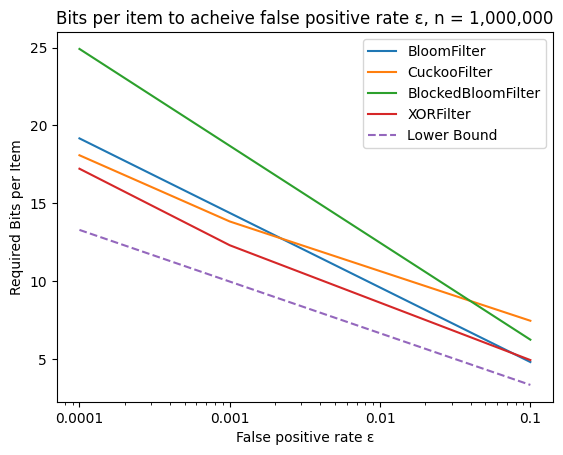

In [32]:
line_plot(fileName="bpi_fpr", x="fpr", y="bpi", figureName='Bits per item to acheive false positive rate ε, n = 1,000,000', 
          xscale=True, xlabel="False positive rate ε", ylabel="Required Bits per Item", bound=True)

# line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of number of keys', 
#           xscale=True, xlabel="Number of Keys Inserted", ylabel="Construction time per key (ns)")



[  10000.  100000. 1000000.      nan]
['Bloom' 'Cuckoo' 'Blocked Bloom' 'Xor']


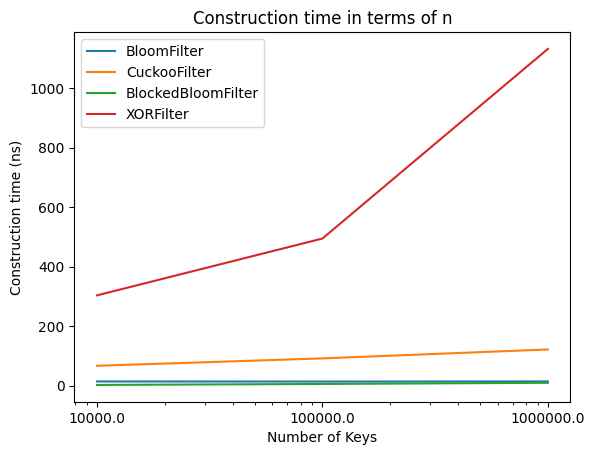

In [33]:
line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of n', 
          xscale=True, xlabel="Number of Keys", ylabel="Construction time (ns)", iter=True, bound=False)

## Bar Plot

In [34]:
def bar_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    df['FilterType'] = df['FilterType'].astype(str)
    if iter:
        grouped = df.groupby(['FilterType', x])[y].agg(['mean', 'std', 'count']).reset_index()
        grouped['stderr'] = grouped['std'] / np.sqrt(grouped['count'])
    else:
        grouped = df.copy()
        grouped['stderr'] = 0  # Assuming no error if not iterating

    x_values = df[x].unique()
    x_pos = np.arange(len(x_values))
    width = 0.2

    plt.figure()

    if xscale:
        plt.xscale('log')

    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }
    legend_added = []

    for i, xval in enumerate(x_values):
        for j, ftype in enumerate(['Bloom', 'Cuckoo', 'Blocked Bloom', 'Xor']):
            subset = grouped[(grouped['FilterType'] == ftype) & (grouped[x] == xval)]
            if not subset.empty:
                plt.bar(i - width * 1.5 + j * width, subset['mean'].values[0], width,
                        color=filter_colors[ftype],  # Set color for each filter type
                        yerr=subset['stderr'].values[0], label=ftype if ftype not in legend_added else "", capsize=5)
                if ftype not in legend_added:
                    legend_added.append(ftype)
    plt.xticks(x_pos, labels=np.round(x_values, 2))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

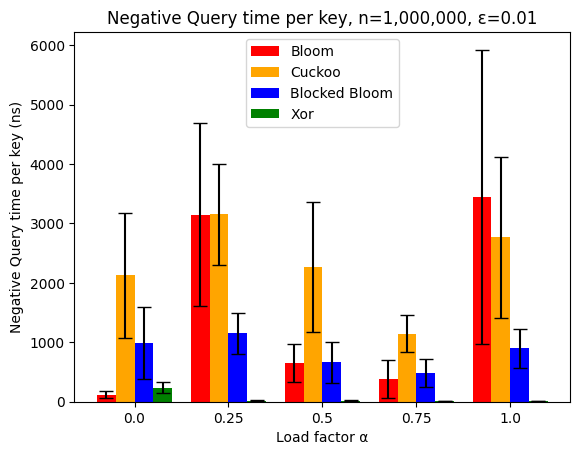

In [35]:
bar_plot(fileName="lf_negQueryTime", x="lf", y="queryTime", figureName='Negative Query time per key, n=1,000,000, ε=0.01', 
          xscale=False, xlabel="Load factor α", ylabel="Negative Query time per key (ns)", iter=True, bound=False)

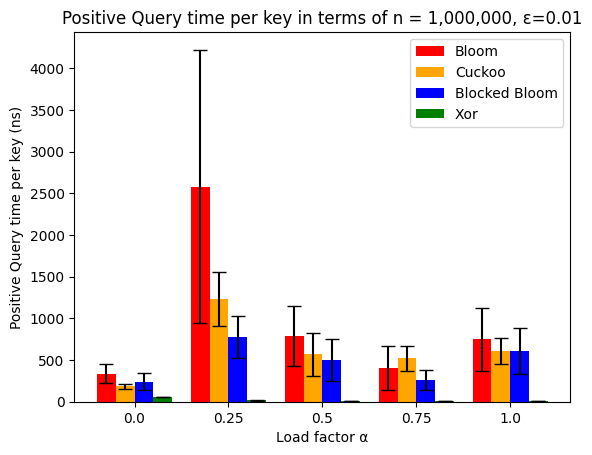

In [36]:
bar_plot(fileName="lf_posQueryTime", x="lf", y="queryTime", figureName='Positive Query time per key in terms of n = 1,000,000, ε=0.01', 
          xscale=False, xlabel="Load factor α", ylabel="Positive Query time per key (ns)", iter=True, bound=False)

## Bar plot without labeled x

In [37]:
def bar_plot_no_x(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    # Check if we need to aggregate data and calculate errors
    if iter:
        # Compute mean and standard error if there are multiple observations
        grouped = df.groupby('FilterType').agg(
            mean=(y, 'mean'),
            stderr=(y, 'std')
        )
        # Standard Error of the Mean (SEM)
        grouped['stderr'] = grouped['stderr'] / np.sqrt(df.groupby('FilterType').size())
    else:
        # If no iteration over multiple datasets, just use the data as is
        grouped = df.copy()
        grouped.rename(columns={y: 'mean'}, inplace=True)
        grouped['stderr'] = 0  # No error bars if there's no iteration

    # Set the colors for each filter type
    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }

    plt.figure(figsize=(10, 6))
    x_pos = np.arange(len(grouped))

    # Create a bar chart
    bars = plt.bar(x_pos, grouped['mean'], yerr=grouped['stderr'], color=[filter_colors[ftype] for ftype in grouped.index], capsize=5)

    # Adding labels for each bar
    plt.xticks(x_pos, grouped.index, rotation=45)

    # Set scales and labels
    if xscale:
        plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)

    # Optional horizontal reference line
    if bound:
        plt.axhline(y=0.01, color='gray', linestyle='--', label='Target False Positive, ε = 0.01')
        
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    plt.savefig("./out/"+ fileName + ".pdf")

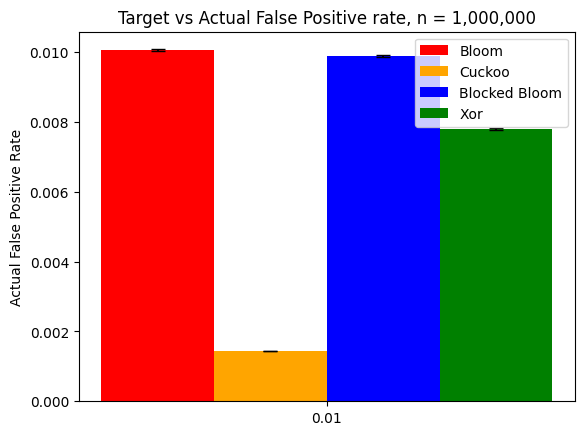

In [38]:
bar_plot(fileName="target_actual_fpr", x="target", y="actual", figureName='Target vs Actual False Positive rate, n = 1,000,000', 
          xscale=False, xlabel="", ylabel="Actual False Positive Rate", iter=True, bound=True)

    FilterType            n       fpr  targetFpr  iteration
0        Bloom      10000.0  0.001100      0.001          0
1        Bloom      10000.0  0.001100      0.001          1
2        Bloom      10000.0  0.001300      0.001          2
3        Bloom      10000.0  0.000900      0.001          3
4        Bloom      10000.0  0.000300      0.001          4
..         ...          ...       ...        ...        ...
145      Bloom  100000000.0  0.102618      0.100          5
146      Bloom  100000000.0  0.102638      0.100          6
147      Bloom  100000000.0  0.102636      0.100          7
148      Bloom  100000000.0  0.102624      0.100          8
149      Bloom  100000000.0  0.102660      0.100          9

[150 rows x 5 columns]
0    7.943282e+03
1    7.943282e+04
2    7.943282e+05
3    7.943282e+06
4    7.943282e+07
Name: n, dtype: float64
5    7.943282e+03
6    7.943282e+04
7    7.943282e+05
8    7.943282e+06
9    7.943282e+07
Name: n, dtype: float64
10    7.943282e+03
11    7.9

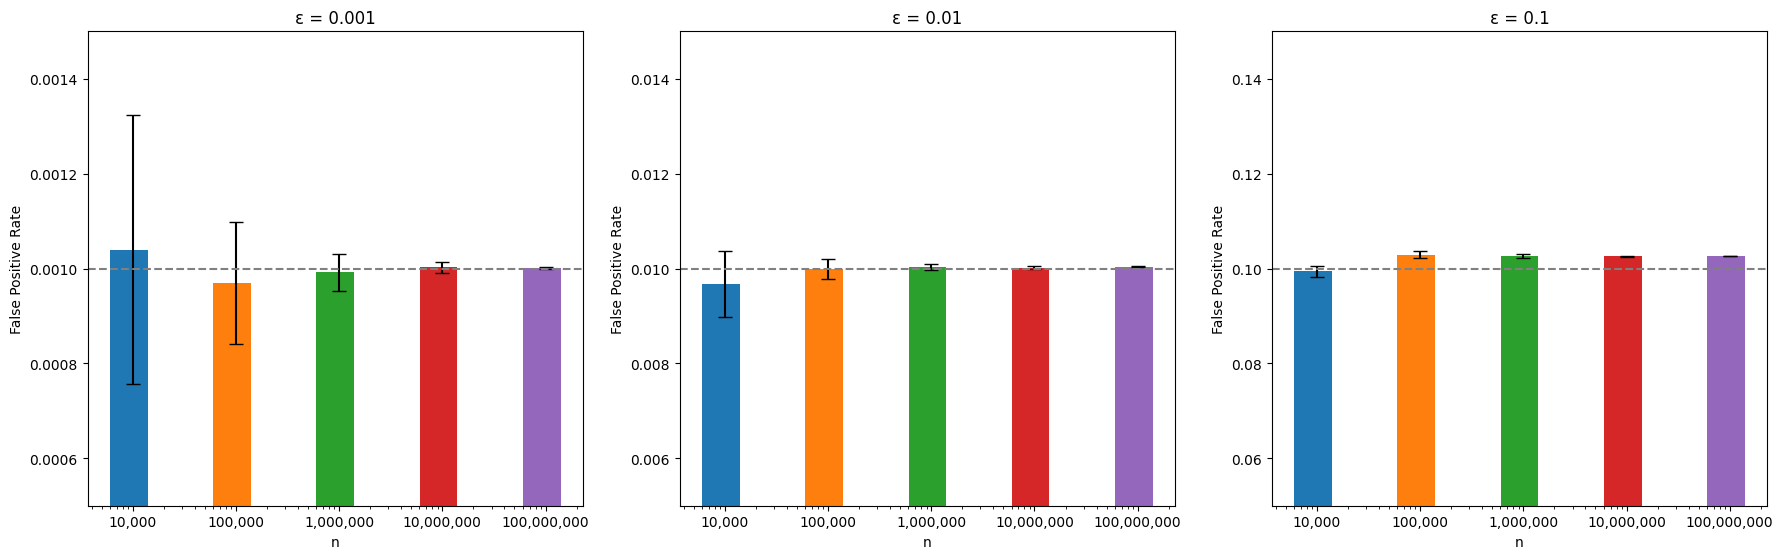

In [131]:
df = pd.read_csv('out/report/bloom_n_fpr.csv')
print(df)
df.columns = ['FilterType', 'n', 'fpr', 'targetFpr', 'iteration']

grouped_stats = df.groupby(['targetFpr', 'n']).agg({
    'fpr': ['mean', 'std']
}).reset_index()
grouped_stats.columns = ['targetFpr', 'n', 'fpr_mean', 'fpr_std']

unique_ns = sorted(df['n'].unique())
color_map = {n: plt.cm.tab10(i) for i, n in enumerate(unique_ns)}

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(df['targetFpr'].unique()), figsize=(18, 6), sharey=False)
# fig.suptitle('Comparison of ε vs Measured False Positive Rate')

y_axis_ranges = {
    0.001: (0.0005, 0.0015),
    0.01: (0.005, 0.015),
    0.1: (0.05, 0.15)
}

for ax, target_fpr in zip(axes, sorted(df['targetFpr'].unique())):
    subset = grouped_stats[grouped_stats['targetFpr'] == target_fpr]
    subset = subset.sort_values(by='n')
    
    log_widths = np.diff(np.log10(subset['n'].to_numpy())).mean() * 0.1
    bar_widths = 10 ** (np.log10(subset['n']) - log_widths)
    print(bar_widths)
    for idx, row in subset.iterrows():
        ax.bar(row['n'], row['fpr_mean'], width=bar_widths[idx], yerr=row['fpr_std'], color=color_map[row['n']], capsize=5)
    ax.axhline(y=target_fpr, color='gray', linestyle='--')
    
    ax.set_xscale('log')
    ax.set_title(f'ε = {target_fpr}')
    ax.set_xlabel('n')
    ax.set_xticks(subset['n'])
    ax.set_xticklabels([f"{int(x):,}" for x in subset['n']])
    ax.set_ylabel('False Positive Rate')
    ax.set_ylim(*y_axis_ranges[target_fpr])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), loc='upper center', ncol=len(color_map), bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

plt.savefig("./out/report/bloom_n_fpr" + ".png")

In [147]:
df = pd.read_csv('out/report/bloom_m_fpr.csv')
print(df)
df.columns = ['FilterType', 'm', 'fpr', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_fpr=('fpr', 'mean')).reset_index()
print(grouped)

    FilterType    m       fpr  targetFpr  iteration
0        Bloom  8.0  0.001141      0.001          0
1        Bloom  8.0  0.001103      0.001          1
2        Bloom  8.0  0.001139      0.001          2
3        Bloom  8.0  0.001096      0.001          3
4        Bloom  8.0  0.001128      0.001          4
..         ...  ...       ...        ...        ...
220      Bloom  6.0  0.131898      0.100         10
221      Bloom  6.0  0.132930      0.100         11
222      Bloom  6.0  0.133060      0.100         12
223      Bloom  6.0  0.132012      0.100         13
224      Bloom  6.0  0.132220      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_fpr
0       0.001   8.0     0.001122
1       0.001   9.0     0.001028
2       0.001  10.0     0.001003
3       0.001  11.0     0.001019
4       0.001  12.0     0.001032
5       0.010   5.0     0.011134
6       0.010   6.0     0.010186
7       0.010   7.0     0.010059
8       0.010   8.0     0.010556
9       0.010   9.0   

In [159]:
df = pd.read_csv('out/report/bloom_m_constTime.csv')
print(df)
df.columns = ['FilterType', 'm', 'constTime', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_time=('constTime', 'mean')).reset_index()
print(grouped)

    FilterType    m  constTime  targetFpr  iteration
0        Bloom  8.0  18.500167      0.001          0
1        Bloom  8.0  17.449125      0.001          1
2        Bloom  8.0  17.765625      0.001          2
3        Bloom  8.0  17.424209      0.001          3
4        Bloom  8.0  40.650417      0.001          4
..         ...  ...        ...        ...        ...
220      Bloom  6.0  12.374584      0.100         10
221      Bloom  6.0  11.934750      0.100         11
222      Bloom  6.0  12.313417      0.100         12
223      Bloom  6.0  11.910166      0.100         13
224      Bloom  6.0  12.235917      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_time
0       0.001   8.0     32.355008
1       0.001   9.0     26.991875
2       0.001  10.0     21.610906
3       0.001  11.0     28.139672
4       0.001  12.0     27.580928
5       0.010   5.0     11.194061
6       0.010   6.0     12.137042
7       0.010   7.0     14.116156
8       0.010   8.0     16.003719


In [149]:
df = pd.read_csv('out/report/bloom_m_queryTime.csv')
print(df)
df.columns = ['FilterType', 'm', 'queryTime', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_time=('queryTime', 'mean')).reset_index()
print(grouped)

    FilterType    m  constTime  targetFpr  iteration
0        Bloom  8.0  18.547709      0.001          0
1        Bloom  8.0  18.332834      0.001          1
2        Bloom  8.0  17.988750      0.001          2
3        Bloom  8.0  18.409791      0.001          3
4        Bloom  8.0  18.118917      0.001          4
..         ...  ...        ...        ...        ...
220      Bloom  6.0  17.854375      0.100         10
221      Bloom  6.0  17.960083      0.100         11
222      Bloom  6.0  17.734375      0.100         12
223      Bloom  6.0  17.915000      0.100         13
224      Bloom  6.0  18.078458      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_time
0       0.001   8.0     18.270103
1       0.001   9.0     20.039264
2       0.001  10.0     21.944042
3       0.001  11.0     23.486417
4       0.001  12.0     24.370117
5       0.010   5.0     14.834705
6       0.010   6.0     17.161592
7       0.010   7.0     19.247617
8       0.010   8.0     21.756514


In [155]:
df = pd.read_csv('out/report/cuckoo_b_alpha_n.csv')
print(df)
df.columns = ['FilterType', 'b', 'alpha', 'n', 'iteration']

grouped = df.groupby(['b', 'n']).agg(mean_alpha=('alpha', 'mean')).reset_index()
print(grouped)

    FilterType    b   alpha           n  iteration
0       Cuckoo  1.0  0.4072     10000.0          0
1       Cuckoo  1.0  0.4320     10000.0          1
2       Cuckoo  1.0  0.3633     10000.0          2
3       Cuckoo  1.0  0.3868     10000.0          3
4       Cuckoo  1.0  0.4069     10000.0          4
..         ...  ...     ...         ...        ...
235     Cuckoo  8.0  1.0000  10000000.0         10
236     Cuckoo  8.0  1.0000  10000000.0         11
237     Cuckoo  8.0  1.0000  10000000.0         12
238     Cuckoo  8.0  1.0000  10000000.0         13
239     Cuckoo  8.0  1.0000  10000000.0         14

[240 rows x 5 columns]
      b           n  mean_alpha
0   1.0     10000.0    0.369747
1   1.0    100000.0    0.252517
2   1.0   1000000.0    0.182558
3   1.0  10000000.0    0.130897
4   2.0     10000.0    1.000000
5   2.0    100000.0    1.000000
6   2.0   1000000.0    1.000000
7   2.0  10000000.0    0.981948
8   4.0     10000.0    1.000000
9   4.0    100000.0    1.000000
10  4.0   10

In [157]:
df = pd.read_csv('out/report/cuckoo_b_failure.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['b']).agg(mean_failure=('failure', 'mean')).reset_index()
print(grouped)

   FilterType    b   failure          n  calculated
0      Cuckoo  1.0  0.062067  1000000.0           0
1      Cuckoo  1.0  0.060411  1000000.0           0
2      Cuckoo  1.0  0.059652  1000000.0           0
3      Cuckoo  1.0  0.062250  1000000.0           0
4      Cuckoo  1.0  0.058989  1000000.0           0
5      Cuckoo  1.0  0.062702  1000000.0           0
6      Cuckoo  1.0  0.063502  1000000.0           0
7      Cuckoo  1.0  0.062355  1000000.0           0
8      Cuckoo  1.0  0.058492  1000000.0           0
9      Cuckoo  1.0  0.058889  1000000.0           0
10     Cuckoo  2.0  0.000142  1000000.0           0
11     Cuckoo  2.0  0.000139  1000000.0           0
12     Cuckoo  2.0  0.000162  1000000.0           0
13     Cuckoo  2.0  0.000141  1000000.0           0
14     Cuckoo  2.0  0.000140  1000000.0           0
15     Cuckoo  2.0  0.000161  1000000.0           0
16     Cuckoo  2.0  0.000146  1000000.0           0
17     Cuckoo  2.0  0.000154  1000000.0           0
18     Cucko